# Data Preprocessing for Jabodetabek Housing, Inflation, and Personal Dataset
This notebook shows the process of data cleaning, handling missing values, handling outliers, and preparing the dataset for further analysis, such as modelling. The datasets used in this notebook contain house prices and related features from Jabodetabek, inflation in annual units, and personal data on user expenditure and income.

Here are the links to each dataset:
1. [Jabodetabek house price](https://www.kaggle.com/datasets/nafisbarizki/daftar-harga-rumah-jabodetabek)
2. [Inflation dataset](https://www.bi.go.id/id/statistik/indikator/data-inflasi.aspx)
3. Personal dataset

## Import Library

- Pandas in this case is used for efficient and easy-to-use table-based data (dataframes) manipulation and analysis.
- Matplotlib in this case is used to create data visualizations, such as graphs.
- Seaborn in this case is used to create more elegant and easier statistical data visualizations than Matplotlib. And to measure the level of outliers and correlations between features.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
housing = pd.DataFrame(pd.read_csv("drive/MyDrive/Dataset_CP/jabodetabek_house_price.csv"))
inflasi =  pd.DataFrame(pd.read_csv("drive/MyDrive/Dataset_CP/Data_Inflasi.csv"))
personal = pd.DataFrame(pd.read_csv("drive/MyDrive/Dataset_CP/personal.csv"))

## Assesing Data


## House Price

In [ ]:
housing.tail()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
3548,https://www.rumah123.com/properti/tangerang/ho...,588000000.0,Terbaru Cluster Minimalis Sudimara Dekat Stasiun,"Jombang, Tangerang",Jombang,Tangerang,-6.296615,106.704601,"Masjid, Taman, Tempat Jemuran, Keamanan 24 ja...",rumah,...,1300 mah,0.0,0.0,1.0,0.0,2022.0,baru,NaN,1.0,furnished
3549,https://www.rumah123.com/properti/tangerang/ho...,785000000.0,Rumah Modern Asri dan Nyaman Bebas Banjir Loka...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Masjid, Keamanan, Jogging Track, Taman, Tem...",rumah,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3550,https://www.rumah123.com/properti/tangerang/ho...,755000000.0,Rumah Mewah Murah 2 Lantai Gratis Biaya Biaya ...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Keamanan, Taman, Jogging Track, Tempat Jemur...",rumah,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3551,https://www.rumah123.com/properti/tangerang/ho...,800000000.0,Rumah 2 Lantai Dekat Perkantoran BSD City AEON...,"BSD Provance Parkland, Tangerang",BSD Provance Parkland,Tangerang,-6.288237,106.665859,"Tempat Jemuran, Keamanan, Keamanan 24 jam, Was...",rumah,...,2200 mah,0.0,0.0,2.0,0.0,2022.0,baru,selatan,0.0,furnished
3552,https://www.rumah123.com/properti/tangerang/ho...,655000000.0,"Rumah 2 Lantai Harga 1 Lantai Di Pamulang, Fre...","Sudimara, Tangerang",Sudimara,Tangerang,-6.296963,106.710635,"Kulkas, Masjid, Taman, Lapangan Bola, Tempat ...",rumah,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,timur,2.0,semi furnished


In [ ]:
housing.shape

(3553, 27)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [ ]:
housing.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000


In [ ]:
housing.isna().sum()

,0
url,0
price_in_rp,0
title,0
address,0
district,0
city,0
lat,0
long,0
facilities,0
property_type,1


<Axes: >

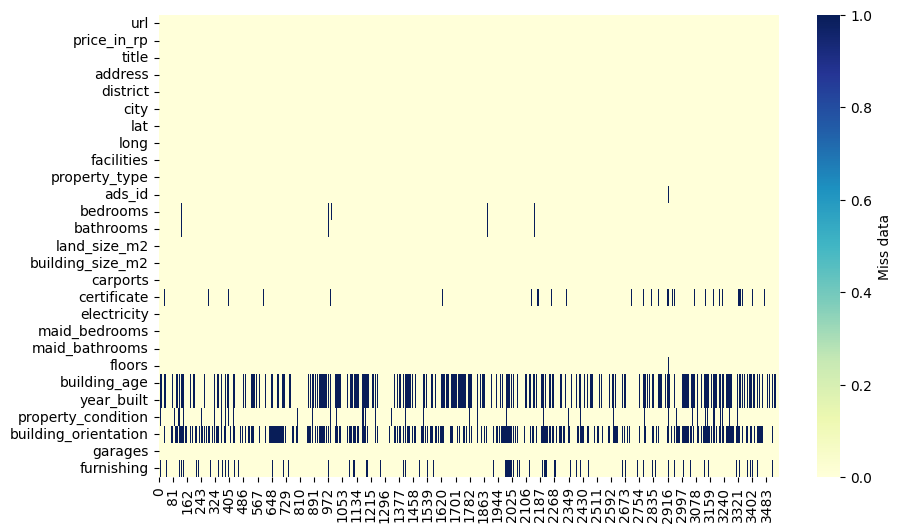

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(housing.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Miss data'})

In [ ]:
print("Jumlah duplikasi: ",housing.duplicated().sum())

Jumlah duplikasi:  0


### Data Cleaning  House Price

Handling missing values ​​with linear interpolation for bedrooms, bathrooms, building_age,year_built data

In [ ]:
housing.head(), housing.isnull().sum()

(                                                 url   price_in_rp  \
 0  https://www.rumah123.com/properti/bekasi/hos11...  2.990000e+09   
 1  https://www.rumah123.com/properti/bekasi/hos10...  1.270000e+09   
 2  https://www.rumah123.com/properti/bekasi/hos10...  1.950000e+09   
 3  https://www.rumah123.com/properti/bekasi/hos10...  3.300000e+09   
 4  https://www.rumah123.com/properti/bekasi/hos10...  4.500000e+09   
 
                                                title  \
 0  Rumah cantik Sumarecon Bekasi\nLingkungan asri...   
 1          Rumah Kekinian, Magenta Summarecon Bekasi   
 2  Rumah Cantik 2 Lantai Cluster Bluebell Summare...   
 3  Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...   
 4  Rumah Hoek di Cluster Maple Summarecon Bekasi,...   
 
                      address           district     city       lat  \
 0  Summarecon Bekasi, Bekasi  Summarecon Bekasi   Bekasi -6.223945   
 1  Summarecon Bekasi, Bekasi  Summarecon Bekasi   Bekasi -6.223945   
 2  Summarecon 


### Handling Missing Value
Missing values in the columns bedrooms, bathrooms, building_age, and year_built are filled using linear interpolation.

In [ ]:
housing[['bedrooms', 'bathrooms', 'building_age','year_built']] = housing[['bedrooms', 'bathrooms', 'building_age','year_built']].interpolate(method='linear')

In [ ]:
print(housing.isnull().sum() * 100 / housing.shape[0])

url                      0.000000
price_in_rp              0.000000
title                    0.000000
address                  0.000000
district                 0.000000
city                     0.000000
lat                      0.000000
long                     0.000000
facilities               0.000000
property_type            0.028145
ads_id                   0.112581
bedrooms                 0.000000
bathrooms                0.000000
land_size_m2             0.056290
building_size_m2         0.056290
carports                 0.000000
certificate              3.968477
electricity              0.000000
maid_bedrooms            0.000000
maid_bathrooms           0.000000
floors                   0.168871
building_age             0.000000
year_built               0.000000
property_condition       6.923726
building_orientation    46.355193
garages                  0.000000
furnishing              10.892204
dtype: float64


Fill missing values ​​with mean/average values ​​in the building_size, land_size, floor columns

In [ ]:
housing = housing.assign(
    building_size_m2=housing['building_size_m2'].fillna(housing['building_size_m2'].mean()),
    land_size_m2=housing['land_size_m2'].fillna(housing['land_size_m2'].mean()),
    floors=housing['floors'].fillna(housing['floors'].mean())
)

Fill missing value data objects with mode in the property type, certificate and property condition columns

In [ ]:
housing['property_type'] = housing['property_type'].fillna(housing['property_type'].mode()[0])
housing['certificate'] = housing['certificate'].fillna(housing['certificate'].mode()[0])
housing['property_condition'] = housing['property_condition'].fillna(housing['property_condition'].mode()[0])

In [ ]:
housing.isna().sum()

,0
url,0
price_in_rp,0
title,0
address,0
district,0
city,0
lat,0
long,0
facilities,0
property_type,0


### Feature Engineering
Combine Bathroom Counts updated to include maid_bathrooms

In [ ]:
housing['bathrooms'] = housing['bathrooms'] + housing['maid_bathrooms']

Dropping columns that are deemed irrelevant for further analysis.

In [ ]:
drop_columns = ['url','lat', 'long','ads_id', 'building_orientation', 'furnishing','maid_bathrooms','building_age']
housing = housing.drop(columns=drop_columns)

Cleaning and converting the electricity column to numeric, replacing invalid values with the median.

In [ ]:
housing['electricity'] = housing['electricity'].str.replace('mah', '')
housing['electricity'] = housing['electricity'].str.replace('lainnya', '0')
housing['electricity'] = housing['electricity'].astype(float)
median_value = housing['electricity'].median()
housing['electricity'] = housing['electricity'].replace(0, median_value)

In [ ]:
housing.isna().sum()

,0
price_in_rp,0
title,0
address,0
district,0
city,0
facilities,0
property_type,0
bedrooms,0
bathrooms,0
land_size_m2,0


### Handle Outliers

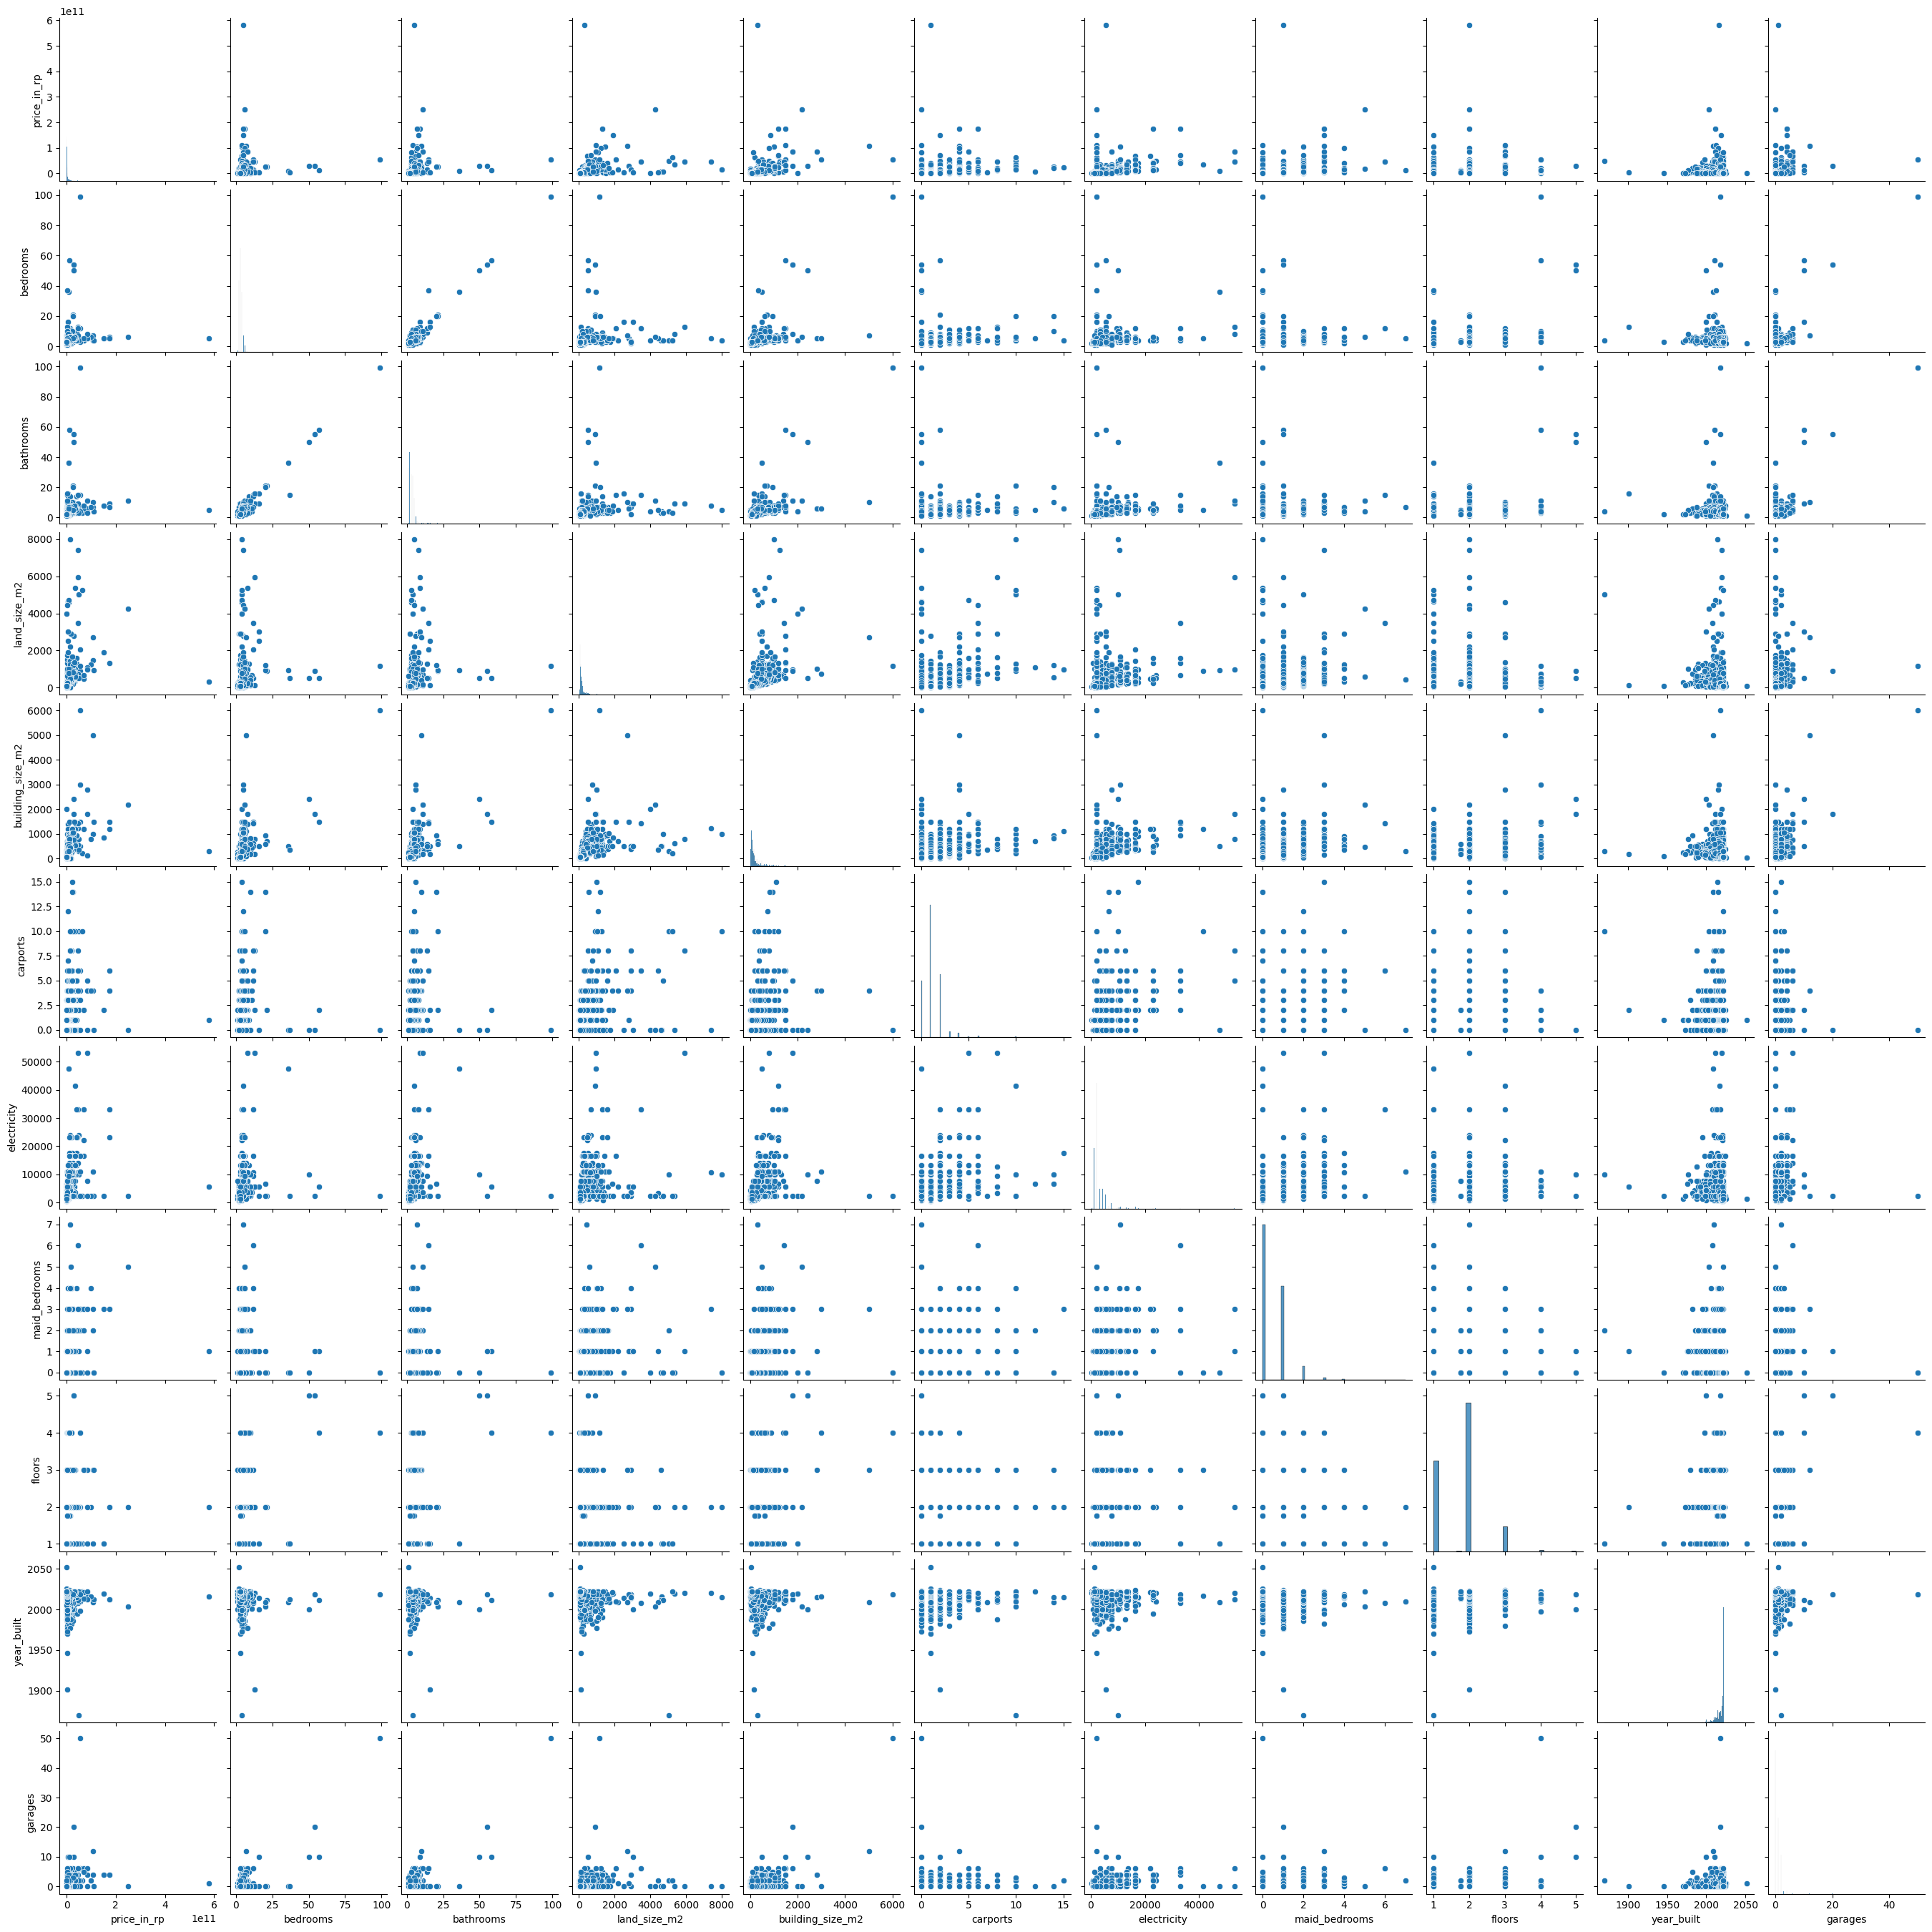

In [ ]:
sns.pairplot(data=housing)

Outliers in numeric columns are handled using the Interquartile Range (IQR) method.

In [ ]:
def handle_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - 1.5 * IQR
    maximum = Q3 + 1.5 * IQR
    column = column.mask(column < minimum, minimum)
    column = column.mask(column > maximum, maximum)
    return column

columns_to_clean = [
    'price_in_rp', 'bedrooms', 'bathrooms', 'land_size_m2',
    'building_size_m2', 'carports', 'maid_bedrooms',
    'floors','year_built','garages'
]

for col in columns_to_clean:
    housing[col] = handle_outliers(housing[col])

for col in columns_to_clean:
    print(f'{col}:\n{housing[col].describe()}\n')


price_in_rp:
count    3.553000e+03
mean     2.573831e+09
std      2.378223e+09
min      4.200000e+07
25%      8.000000e+08
50%      1.500000e+09
75%      3.590000e+09
max      7.775000e+09
Name: price_in_rp, dtype: float64

bedrooms:
count    3553.000000
mean        3.202786
std         1.091622
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: bedrooms, dtype: float64

bathrooms:
count    3553.000000
mean        2.868562
std         1.525184
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: bathrooms, dtype: float64

land_size_m2:
count    3553.000000
mean      148.592630
std       100.297173
min        12.000000
25%        75.000000
50%       108.000000
75%       192.000000
max       367.500000
Name: land_size_m2, dtype: float64

building_size_m2:
count    3553.000000
mean      158.138524
std       121.151034
min         1.000000
25%        66.000000
50%       112

Filtering on the housing dataset by only keeping rows where the value in the year_built column is less than or equal to 2024.

In [ ]:
housing = housing[housing['year_built'] <= 2024]

Numeric columns such as bedrooms, bathrooms, and floors are rounded off to the nearest integer.

In [ ]:
housing.loc[:, 'bedrooms'] = housing['bedrooms'].round()
housing.loc[:, 'bathrooms'] = housing['bathrooms'].round()
housing.loc[:, 'carports'] = housing['carports'].round()
housing.loc[:, 'floors'] = housing['floors'].round()
housing.loc[:, 'maid_bedrooms'] = housing['maid_bedrooms'].round()
housing.loc[:, 'garages'] = housing['garages'].round()

In [ ]:
housing.shape

(3551, 19)

In [ ]:
housing.describe()

,price_in_rp,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,floors,year_built,garages
count,3.551000e+03,3551.000000,3551.000000,3551.000000,3551.000000,3551.000000,3551.000000,3551.000000,3551.000000,3551.000000,3551.000000
mean,2.575016e+09,3.202478,2.869614,148.637740,158.204780,1.156012,3082.033230,0.478175,1.764855,2018.619332,0.631935
std,2.378367e+09,1.092280,1.525061,100.307364,121.152919,0.881671,3137.307032,0.612558,0.634380,4.523029,0.760641
min,4.200000e+07,1.000000,1.000000,12.000000,1.000000,0.000000,450.000000,0.000000,1.000000,2007.000000,0.000000
25%,8.000000e+08,2.000000,2.000000,75.000000,66.000000,1.000000,2200.000000,0.000000,1.000000,2016.000000,0.000000
50%,1.500000e+09,3.000000,3.000000,108.000000,112.000000,1.000000,2200.000000,0.000000,2.000000,2021.000000,0.000000
75%,3.595000e+09,4.000000,4.000000,192.500000,208.000000,2.000000,3500.000000,1.000000,2.000000,2022.000000,1.000000
max,7.775000e+09,7.000000,7.000000,367.500000,421.000000,4.000000,53000.000000,2.000000,4.000000,2024.000000,2.000000


In [ ]:
housing.columns

Index(['price_in_rp', 'title', 'address', 'district', 'city', 'facilities',
       'property_type', 'bedrooms', 'bathrooms', 'land_size_m2',
       'building_size_m2', 'carports', 'certificate', 'electricity',
       'maid_bedrooms', 'floors', 'year_built', 'property_condition',
       'garages'],
      dtype='object')

### Looking for Correlation between features

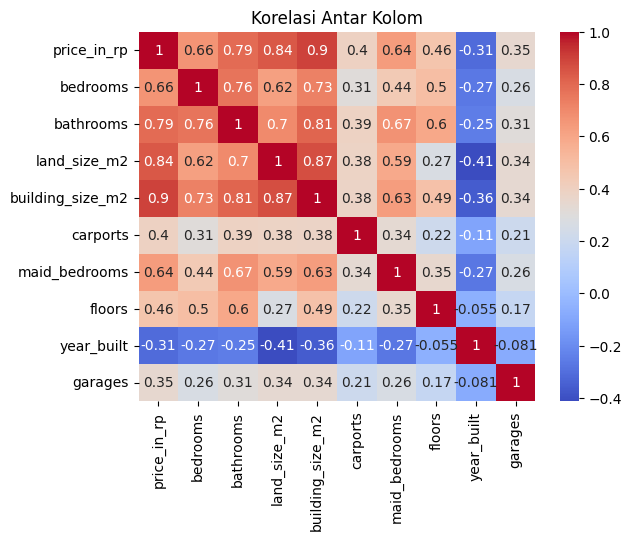

In [ ]:
correlation_matrix = housing[columns_to_clean].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Kolom')
plt.show()

We can see that some columns do not have a high correlation with price, namely the columns (carport, garages, year_built) and several columns that are not needed

In [ ]:
to_drop = ['carports', 'garages', 'year_built','title','address','facilities','property_type','property_condition','certificate','district']
housing = housing.drop(columns=to_drop)

In [ ]:
housing.head()

,price_in_rp,city,bedrooms,bathrooms,land_size_m2,building_size_m2,electricity,maid_bedrooms,floors
0,2.990000e+09,Bekasi,4.0,5.0,239.0,272.0,4400.0,0.0,2.0
1,1.270000e+09,Bekasi,3.0,2.0,55.0,69.0,2200.0,0.0,2.0
2,1.950000e+09,Bekasi,3.0,4.0,119.0,131.0,2200.0,1.0,2.0
3,3.300000e+09,Bekasi,3.0,4.0,180.0,174.0,3500.0,1.0,2.0
4,4.500000e+09,Bekasi,4.0,4.0,328.0,196.0,3500.0,1.0,2.0


In [ ]:
housing.columns

Index(['price_in_rp', 'city', 'bedrooms', 'bathrooms', 'land_size_m2',
       'building_size_m2', 'electricity', 'maid_bedrooms', 'floors'],
      dtype='object')

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3551 entries, 0 to 3552
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price_in_rp       3551 non-null   float64
 1   city              3551 non-null   object 
 2   bedrooms          3551 non-null   float64
 3   bathrooms         3551 non-null   float64
 4   land_size_m2      3551 non-null   float64
 5   building_size_m2  3551 non-null   float64
 6   electricity       3551 non-null   float64
 7   maid_bedrooms     3551 non-null   float64
 8   floors            3551 non-null   float64
dtypes: float64(8), object(1)
memory usage: 277.4+ KB


In [ ]:
housing.shape

(3551, 9)

In [ ]:
city_categories = housing['city'].nunique()
print(f"Jumlah kategori unik di kolom 'city': {city_categories}")
print(housing['city'].unique())

Jumlah kategori unik di kolom 'city': 9
[' Bekasi' ' Bogor' ' Depok' ' Jakarta Barat' ' Jakarta Selatan'
 ' Jakarta Utara' ' Jakarta Timur' ' Jakarta Pusat' ' Tangerang']


### Save data cleaning as csv

In [ ]:
housing.to_csv('house_clean_v3.csv', index=False)
print("Data berhasil disimpan")

Data berhasil disimpan


## Inflation


In [ ]:
inflasi.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Data Inflasi,Data Inflasi,Data Inflasi,Data Inflasi
2,NaN,NaN,NaN,NaN
3,No,Periode,Data Inflasi,NaN
4,1,September 2024,1.84 %,NaN


In [ ]:
inflasi.shape

(266, 4)

In [ ]:
inflasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  264 non-null    object
 1   Unnamed: 1  264 non-null    object
 2   Unnamed: 2  264 non-null    object
 3   Unnamed: 3  1 non-null      object
dtypes: object(4)
memory usage: 8.4+ KB


In [ ]:
inflasi.isna().sum()

,0
Unnamed: 0,2
Unnamed: 1,2
Unnamed: 2,2
Unnamed: 3,265


In [ ]:
print(inflasi.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')


### Data cleaning
Delete columns that are irrelevant or do not have important information and organize column names.

In [ ]:
inflasi = inflasi.drop(columns=['Unnamed: 0', 'Unnamed: 3'])
inflasi.columns = inflasi.iloc[1]
inflasi = inflasi[2:]

In [ ]:
inflasi.tail()

1,Data Inflasi,Data Inflasi
261,April 2003,7.62 %
262,Maret 2003,7.17 %
263,Februari 2003,7.6 %
264,Januari 2003,8.68 %
265,Desember 2002,0 %


Rename the columns to be more descriptive
- Period for the time period column.
- Inflation_Data for the column containing the inflation figures.

In [ ]:
inflasi.columns = ['Periode', 'Data_Inflasi']

In [ ]:
inflasi.columns

Index(['Periode', 'Data_Inflasi'], dtype='object')

In [ ]:
inflasi.isna().sum()

,0
Periode,1
Data_Inflasi,1


Deletes rows with blank values ​​(NaN) in the Period or Inflation_Data column.

In [ ]:
inflasi = inflasi.dropna(subset=['Periode', 'Data_Inflasi'])
print(inflasi.isna().sum())

Periode         0
Data_Inflasi    0
dtype: int64


In [ ]:
inflasi.head()

,Periode,Data_Inflasi
3,Periode,Data Inflasi
4,September 2024,1.84 %
5,Agustus 2024,2.12 %
6,Juli 2024,2.13 %
7,Juni 2024,2.51 %


Remove the % symbol from the Inflation Data column, convert the value to float, and divide by 100 to convert to decimal format.

In [ ]:
inflasi = inflasi.iloc[1:]
inflasi['Data_Inflasi'] = inflasi['Data_Inflasi'].str.replace('%', '').astype(float)
inflasi['Data_Inflasi'] = inflasi['Data_Inflasi'] / 100

<ipython-input-11-c93b10e65ef1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflasi['Data_Inflasi'] = inflasi['Data_Inflasi'].str.replace('%', '').astype(float)
<ipython-input-11-c93b10e65ef1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflasi['Data_Inflasi'] = inflasi['Data_Inflasi'] / 100


In [ ]:
inflasi.head()

,Periode,Data_Inflasi
4,September 2024,0.0184
5,Agustus 2024,0.0212
6,Juli 2024,0.0213
7,Juni 2024,0.0251
8,Mei 2024,0.0284


In [ ]:
inflasi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 4 to 265
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periode       262 non-null    object 
 1   Data_Inflasi  262 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


Create a month dictionary to change the month names from Indonesian to English, change the column to datetime format and make the period column an ​​index so that the time format is easier to process.

In [ ]:
bulan = {
    'Januari': 'January', 'Februari': 'February', 'Maret': 'March',
    'April': 'April', 'Mei': 'May', 'Juni': 'June',
    'Juli': 'July', 'Agustus': 'August', 'September': 'September',
    'Oktober': 'October', 'November': 'November', 'Desember': 'December'
}
if inflasi['Periode'].dtype == 'object':
    inflasi['Periode'] = inflasi['Periode'].replace(bulan, regex=True)
    inflasi['Periode'] = pd.to_datetime(inflasi['Periode'], format='%B %Y')
    inflasi.set_index('Periode', inplace=True)
else:
    print("Kolom 'Periode' sudah dalam format datetime atau telah diatur sebagai index.")


            Data_Inflasi
Periode                 
2024-09-01        0.0184
2024-08-01        0.0212
2024-07-01        0.0213
2024-06-01        0.0251
2024-05-01        0.0284


In [ ]:
inflasi = inflasi.reset_index()

In [ ]:
inflasi.columns

Index(['Periode', 'Data_Inflasi'], dtype='object')

In [ ]:
inflasi.head()

,Periode,Data_Inflasi
0,2024-09-01,0.0184
1,2024-08-01,0.0212
2,2024-07-01,0.0213
3,2024-06-01,0.0251
4,2024-05-01,0.0284


In [ ]:
inflasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Periode       262 non-null    datetime64[ns]
 1   Data_Inflasi  262 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


### Save data inflation cleaning as csv

In [ ]:
inflasi.to_csv('inflasi_clean.csv', index=False)
print("Data berhasil disimpan")

Data berhasil disimpan


## Personal

### Assesing Data

In [ ]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tanggal       4000 non-null   object
 1   pendapatan    4000 non-null   int64 
 2   tabungan      4000 non-null   int64 
 3   jumlah_pokok  4000 non-null   int64 
 4   jumlah_want   4000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 156.4+ KB


In [ ]:
personal.shape

(4000, 5)

In [ ]:
personal.isna().sum()

,0
tanggal,0
pendapatan,0
tabungan,0
jumlah_pokok,0
jumlah_want,0


In [ ]:
personal.duplicated().sum()

2

In [ ]:
duplicates = personal[personal.duplicated()]
print(duplicates)

        tanggal  pendapatan  tabungan  jumlah_pokok  jumlah_want
3005  9/26/2024     6726000   1345200       3363000      2017800
3261   5/6/2021     8922000   1784400       4461000      2676600


In [ ]:
personal.isna().sum()

,0
tanggal,0
pendapatan,0
tabungan,0
jumlah_pokok,0
jumlah_want,0


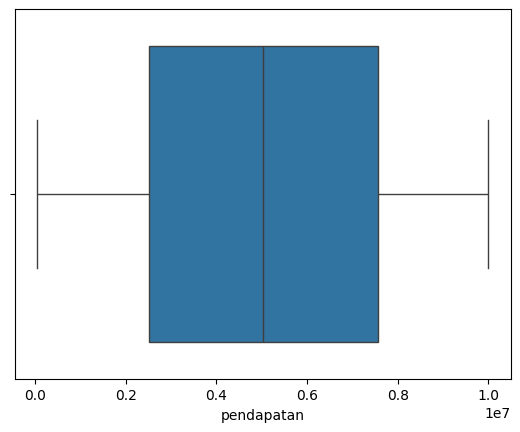

In [ ]:
sns.boxplot(x=personal['pendapatan'])
plt.show()

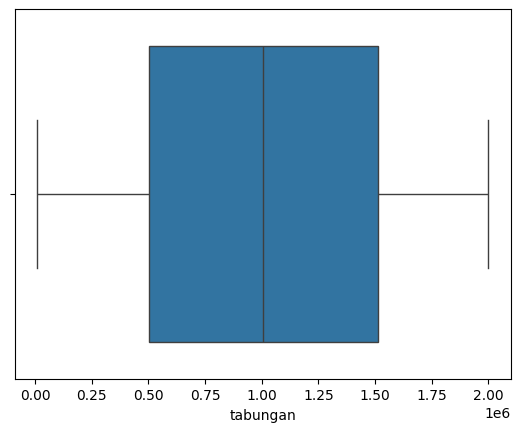

In [ ]:
sns.boxplot(x=personal['tabungan'])
plt.show()

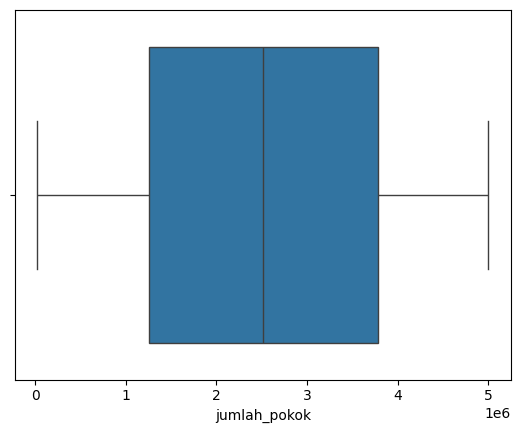

In [ ]:
sns.boxplot(x=personal['jumlah_pokok'])
plt.show()

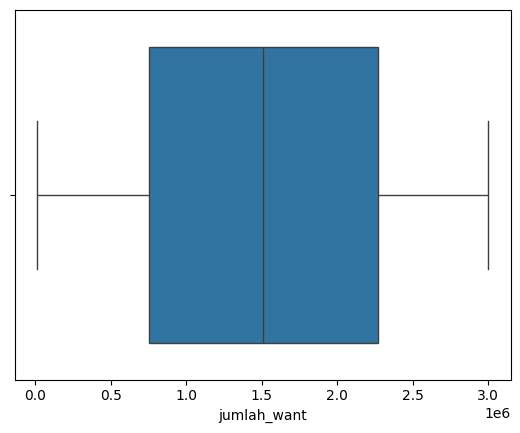

In [ ]:
sns.boxplot(x=personal['jumlah_want'])
plt.show()

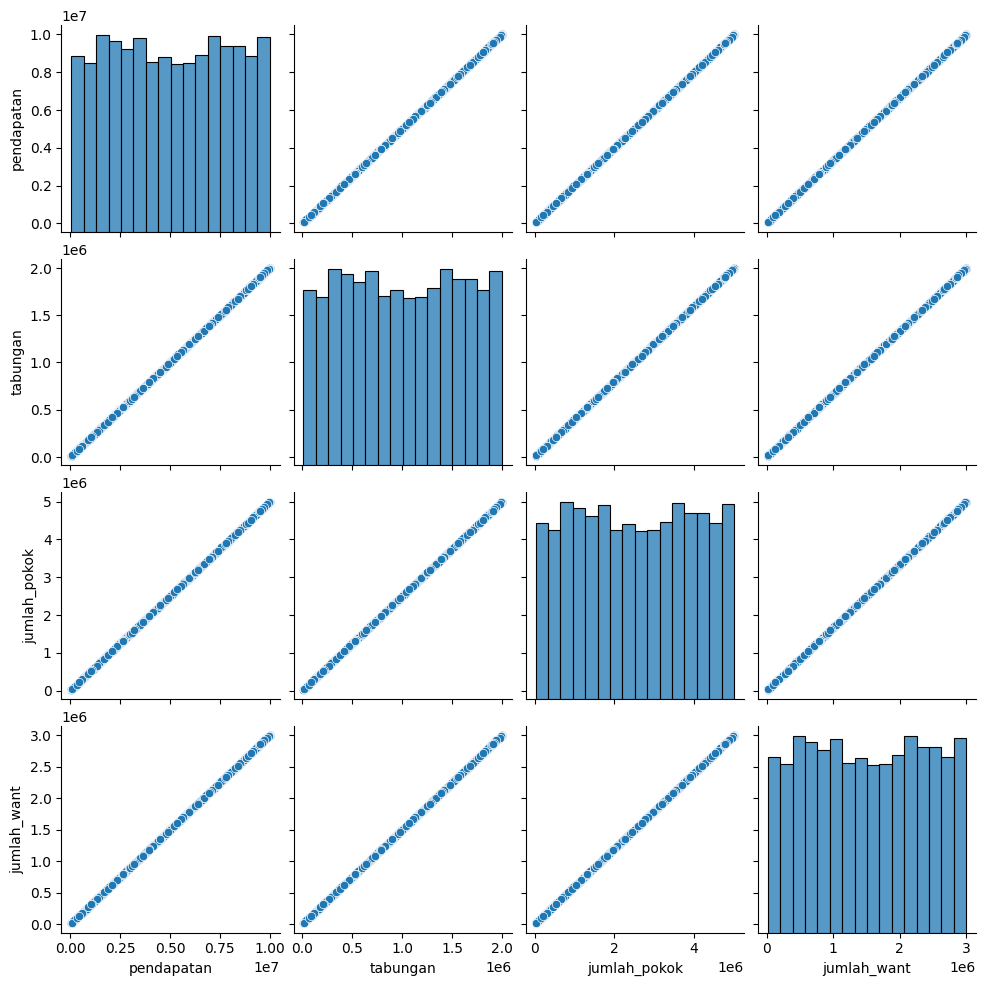

In [ ]:
sns.pairplot(data=personal)

### Cleaning Data

Convert Columns to Datetime Format

In [ ]:
datetime_columns = ["tanggal"]
for column in datetime_columns:
  personal[column] = pd.to_datetime(personal[column])

In [ ]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   tanggal       4000 non-null   datetime64[ns]
 1   pendapatan    4000 non-null   int64         
 2   tabungan      4000 non-null   int64         
 3   jumlah_pokok  4000 non-null   int64         
 4   jumlah_want   4000 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 156.4 KB


In [ ]:
personal.describe()

,tanggal,pendapatan,tabungan,jumlah_pokok,jumlah_want
count,4000,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,2023-01-01 07:34:19.200000,5.044902e+06,1.008980e+06,2.522451e+06,1.513470e+06
min,2021-01-14 00:00:00,5.300000e+04,1.060000e+04,2.650000e+04,1.590000e+04
25%,2022-01-01 18:00:00,2.517500e+06,5.035000e+05,1.258750e+06,7.552500e+05
50%,2022-12-26 00:00:00,5.024000e+06,1.004800e+06,2.512000e+06,1.507200e+06
75%,2023-12-28 00:00:00,7.563000e+06,1.512600e+06,3.781500e+06,2.268900e+06
max,2024-12-19 00:00:00,9.999000e+06,1.999800e+06,4.999500e+06,2.999700e+06
std,NaN,2.888334e+06,5.776668e+05,1.444167e+06,8.665002e+05


In [ ]:
personal.head()

,tanggal,pendapatan,tabungan,jumlah_pokok,jumlah_want
0,2022-12-25,1742000,348400,871000,522600
1,2023-04-04,7655000,1531000,3827500,2296500
2,2021-10-13,7678000,1535600,3839000,2303400
3,2021-01-14,5745000,1149000,2872500,1723500
4,2023-03-16,3405000,681000,1702500,1021500


### Save data personal as csv

In [ ]:
personal.to_csv('personal_clean.csv', index=False)

print("Data berhasil disimpan")

Data berhasil disimpan


# Combine

In [ ]:
combined_data = pd.concat([housing, inflasi, personal], axis=1)

In [ ]:
print(combined_data.dtypes)

price_in_rp                  float64
title                         object
address                       object
district                      object
city                          object
facilities                    object
property_type                 object
bedrooms                     float64
bathrooms                    float64
land_size_m2                 float64
building_size_m2             float64
certificate                   object
electricity                  float64
maid_bedrooms                float64
floors                       float64
property_condition            object
Periode                       object
Data_Inflasi                  object
tanggal               datetime64[ns]
pendapatan                     int64
tabungan                       int64
jumlah_pokok                   int64
jumlah_want                    int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()

categorical_columns_housing = ['title', 'address', 'district', 'city', 'facilities', 'property_type', 'certificate', 'property_condition']
categorical_columns_inflasi = ['Periode', 'Data_Inflasi']
categorical_columns_personal = ['tanggal', 'pendapatan','tabungan','jumlah_pokok' , 'jumlah_want']

for col in categorical_columns_housing:
    housing[col] = le.fit_transform(housing[col])
for col in categorical_columns_inflasi:
    inflasi[col] = le.fit_transform(inflasi[col])
for col in categorical_columns_personal:
    personal[col] = le.fit_transform(personal[col])

combined_data = pd.concat([housing, inflasi, personal], axis=1)
print(combined_data.head())

    price_in_rp   title  address  district  city  facilities  property_type  \
0  2.990000e+09  2840.0    355.0     343.0   0.0      1834.0            0.0   
1  1.270000e+09  1873.0    355.0     343.0   0.0      1393.0            0.0   
2  1.950000e+09  1580.0    355.0     343.0   0.0       394.0            0.0   
3  3.300000e+09  1971.0    355.0     343.0   0.0       298.0            0.0   
4  4.500000e+09  1835.0    355.0     343.0   0.0       398.0            0.0   

   bedrooms  bathrooms  land_size_m2  ...  maid_bedrooms  floors  \
0       4.0        5.0         239.0  ...            0.0     2.0   
1       3.0        2.0          55.0  ...            0.0     2.0   
2       3.0        4.0         119.0  ...            1.0     2.0   
3       3.0        4.0         180.0  ...            1.0     2.0   
4       4.0        4.0         328.0  ...            1.0     2.0   

   property_condition  Periode  Data_Inflasi  tanggal  pendapatan  tabungan  \
0                 0.0      NaN       

In [ ]:
combined_data.shape

(4000, 23)

In [ ]:
print(combined_data.dtypes)

price_in_rp           float64
title                 float64
address               float64
district              float64
city                  float64
facilities            float64
property_type         float64
bedrooms              float64
bathrooms             float64
land_size_m2          float64
building_size_m2      float64
certificate           float64
electricity           float64
maid_bedrooms         float64
floors                float64
property_condition    float64
Periode               float64
Data_Inflasi          float64
tanggal                 int64
pendapatan              int64
tabungan                int64
jumlah_pokok            int64
jumlah_want             int64
dtype: object


                    price_in_rp     title   address  district      city  \
price_in_rp            1.000000 -0.034994  0.017751  0.012714  0.355156   
title                 -0.034994  1.000000  0.085022  0.086547 -0.058214   
address                0.017751  0.085022  1.000000  0.999390 -0.250384   
district               0.012714  0.086547  0.999390  1.000000 -0.261153   
city                   0.355156 -0.058214 -0.250384 -0.261153  1.000000   
facilities            -0.088814 -0.005613  0.141783  0.144677 -0.197277   
property_type               NaN       NaN       NaN       NaN       NaN   
bedrooms               0.664787 -0.067249 -0.031412 -0.035508  0.260870   
bathrooms              0.793568 -0.075571  0.016771  0.012320  0.302798   
land_size_m2           0.840468  0.009439  0.093431  0.091541  0.148088   
building_size_m2       0.896476 -0.035007  0.062644  0.059248  0.237508   
certificate           -0.024350  0.012805 -0.096011 -0.097711  0.106790   
electricity            0.

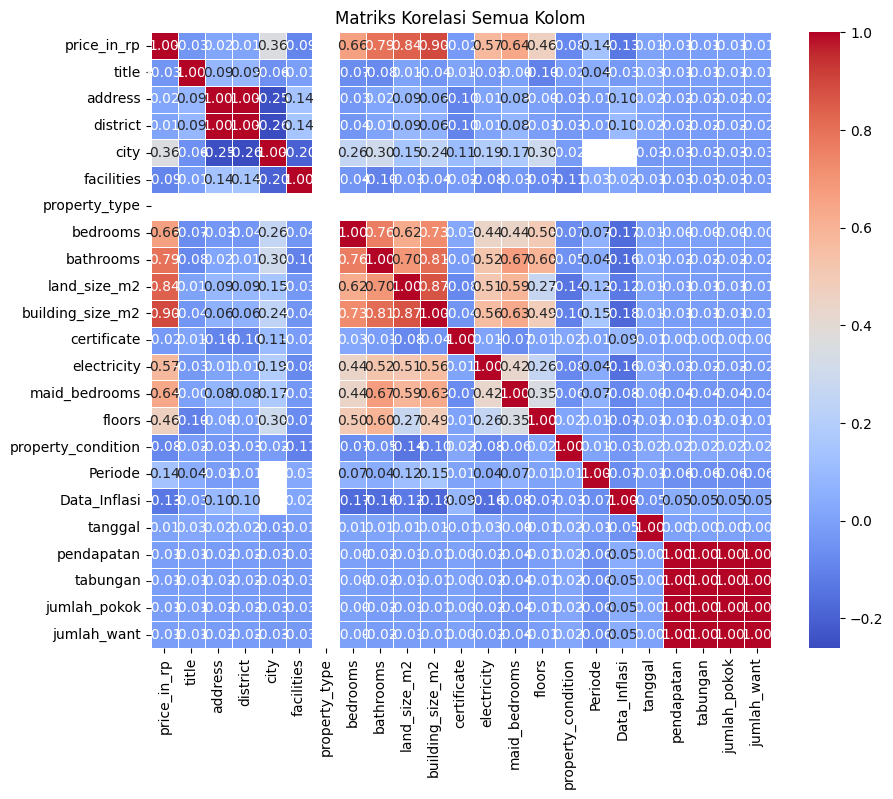

In [ ]:
correlation_matrix = combined_data.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi Semua Kolom")
plt.show()